# Distribution Test
## - 각 feature들에 대해 성공/실패 샘플에 대한 분포 검정(평균, 분포)

## 가정
- 각 카테고리별 분포 차이는 무의미 (샘플수가 너무 작음)
- 지역별 차이는 무의미 (서울, 경기권에 몰려있음)
- target(목표펀딩금액)이 결과에 가장 큰 영향을 미칠 것
- 월별 분포 차이

## [grammar_level 가정]


- grammar_level은 개설자의 수준을 대변
- 맞춤법과 신뢰도는 상관관계 (http://www.copydesk.org/forms/nrj-article-recall.pdf)
- grammar_level이 결과에 영향

In [1]:
wadiz_df_original = pd.read_csv('wadiz_df_0329_1.csv', index_col=0)
user_comment = pd.read_csv('user_data_all_0329.csv', index_col=0)
provider_comment = pd.read_csv('provider_data_all_0329.csv', index_col=0)
wadiz_df = pd.read_csv('wadiz_provider_analysis_0329.csv', index_col=0)
provider_comment_grammar = pd.read_csv('comment_analysis.csv', index_col=0)

In [2]:
# 각 DataFrame별 샘플 수 비교
print('Original DataFrame :', len(wadiz_df_original))
print('User comment :', len(user_comment['project_id'].value_counts()))
print('Provider comment :', len(provider_comment['project_id'].value_counts()))
print('Provider comment grammar check:', len(provider_comment_grammar['project_id'].value_counts()))
print('Revised DataFrame :', len(wadiz_df))

Original DataFrame : 823
User comment : 720
Provider comment : 614
Provider comment grammar check: 599
Revised DataFrame : 599


* 최종 분석 샘플 : 599개 (0값 제거, grammar_level 측정 가능 샘플만 포함)

In [3]:
# grammar null값 제거
wadiz_df = wadiz_df[wadiz_df['provider_grammar_level'].notnull()]
# duration 처리
wadiz_df['date_duration'] = wadiz_df['date_duration'].apply(lambda x: int(x[:-24]))

* Kolmogorov-Smirnov test : 두 분포의 차이 검정
* 2 sample T-test : 두 샘플의 평균 차이 검정
* Shapiro test : 단일 분포의 정규성 검정
* Mann-Whitney U test : 비모수 검정법, 두 샘플의 평균 차이 검정

## 1. Category Distribution

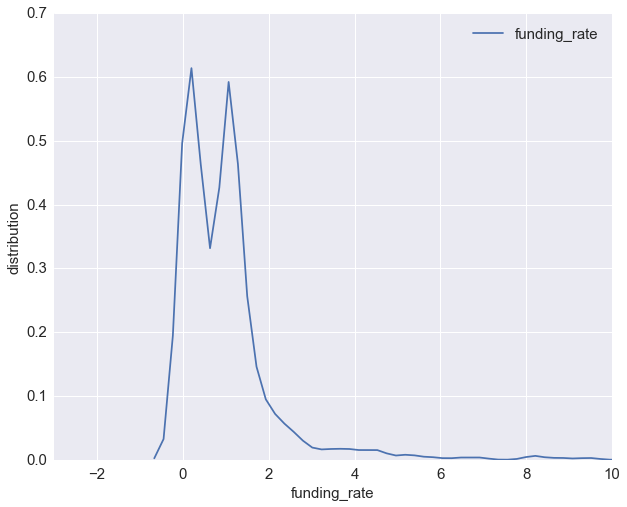

In [4]:
figure = plt.figure(figsize=(10,8));
sns.kdeplot(wadiz_df['funding_rate']);
plt.xlim(-3, 10);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend(fontsize = 15);
plt.xlabel('funding_rate', fontsize=15);
plt.ylabel('distribution', fontsize = 15);

In [5]:
# 전체 분산과 각 category 분산과의 분포 차이 검정
# K-S : Kolmogorov Smirnov test
for i in wadiz_df['category'].unique()[:-1]:
    all_data = wadiz_df['funding_rate']
    category_data = wadiz_df.loc[wadiz_df['category'] == i]['funding_rate']
    print('[all_sample vs {category_i}]'.format(category_i = i)), 
    print('  K-S statistic :', round(sp.stats.ks_2samp(all_data, category_data)[0], 4))
    print('  p-value :', round(sp.stats.ks_2samp(all_data, category_data)[1], 4))

[all_sample vs share/public]
  K-S statistic : 0.0805
  p-value : 0.3296
[all_sample vs book/movie]
  K-S statistic : 0.1714
  p-value : 0.1709
[all_sample vs education]
  K-S statistic : 0.0727
  p-value : 0.9751
[all_sample vs life/fashion]
  K-S statistic : 0.0761
  p-value : 0.6917
[all_sample vs sports]
  K-S statistic : 0.3637
  p-value : 0.0183
[all_sample vs tech/design]
  K-S statistic : 0.1013
  p-value : 0.404
[all_sample vs game/comics]
  K-S statistic : 0.3634
  p-value : 0.2547
[all_sample vs music/concert]
  K-S statistic : 0.108
  p-value : 0.8133
[all_sample vs environment]
  K-S statistic : 0.1409
  p-value : 0.6719
[all_sample vs figure/webtoon]
  K-S statistic : 0.5962
  p-value : 0.1489
[all_sample vs travel]
  K-S statistic : 0.2445
  p-value : 0.2394
[all_sample vs art/photo/exhibit]
  K-S statistic : 0.2148
  p-value : 0.1144


* 모든 test-statistics의 p-value들이 0.05이상이므로 귀무가설(null hypothesis : 분포가 같다) 기각(reject) 불가

## 2. Area Distribution

In [6]:
print(wadiz_df['area'].value_counts())

seoul       387
kyungki     109
busan        19
incheon      15
kyungbuk     12
chungnam      8
jeonbuk       8
kangwon       7
chungbuk      7
deagu         7
deajeon       6
kyungnam      5
gwangju       3
sejong        1
ulsan         1
jeju          1
Name: area, dtype: int64


* 지역별 샘플개수가 작아서 분포의 차이 검정 불가

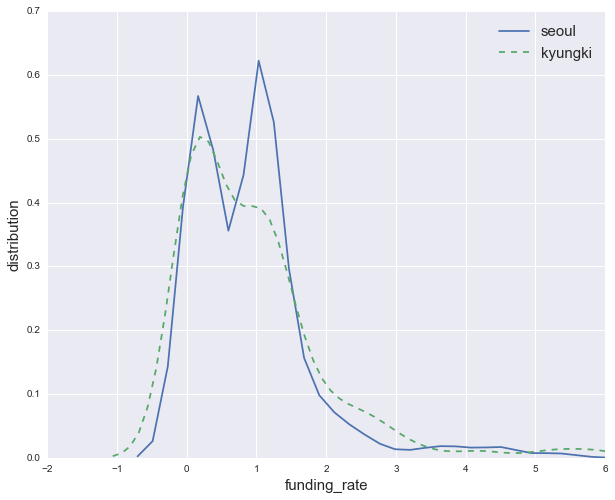

In [7]:
# 가장 많은 부분을 차지하는 서울/경기만 분석
plt.figure(figsize=(10,8));
sns.kdeplot(wadiz_df.loc[wadiz_df['area'] == 'seoul']['funding_rate'], label = 'seoul');
sns.kdeplot(wadiz_df.loc[wadiz_df['area'] == 'kyungki']['funding_rate'], label = 'kyungki', linestyle = '--');
plt.xlim(-2, 6);
plt.legend(fontsize = 15);
plt.xlabel('funding_rate', fontsize=15);
plt.ylabel('distribution', fontsize = 15);

In [8]:
# Ks_2sampResult : Kolmogorov-Smirnov test
# Ttest_indResult : 2 sample T-test

seoul_dist = wadiz_df.loc[wadiz_df['area'] == 'seoul']['funding_rate']
kyungki_dist = wadiz_df.loc[wadiz_df['area'] == 'kyungki']['funding_rate']
print('seoul vs kyungki :'), 
print(sp.stats.ks_2samp(seoul_dist, kyungki_dist))
print(sp.stats.ttest_ind(seoul_dist, kyungki_dist))

seoul vs kyungki :
Ks_2sampResult(statistic=0.08932508356446911, pvalue=0.48753561349755414)
Ttest_indResult(statistic=0.77921371196874878, pvalue=0.43622695124347299)


* 지역간 평균 차이없음 (t-test p-value > 0.05), 분포 차이 없음 (K-S test p-value > 0.05)

## 3. Date_duration Distribution

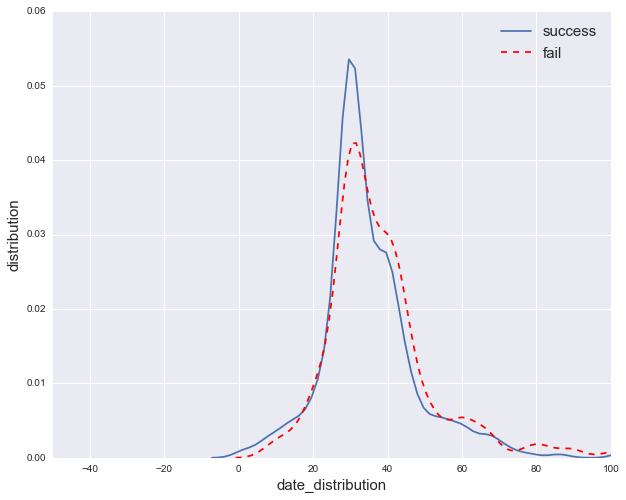

In [35]:
figure = plt.figure(figsize=(10,8))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 1]['date_duration'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 0]['date_duration'], label = 'fail', c='r', linestyle='--')
plt.xlim(-50, 100);
plt.xlabel('date_distribution', fontsize=15);
plt.ylabel('distribution', fontsize = 15);
plt.legend(fontsize = 15);

In [36]:
# Ks_2sampResult : Kolmogorov-Smirnov test
# Ttest_indResult : 2 sample T-test
success_duration = wadiz_df.loc[wadiz_df['success'] == 1]['date_duration']
fail_duration = wadiz_df.loc[wadiz_df['success'] == 0]['date_duration']
print('[success_duration vs fail_duration]'), 
print(sp.stats.ks_2samp(success_duration, fail_duration)),
print(sp.stats.ttest_ind(success_duration, fail_duration))

[success_duration vs fail_duration]
Ks_2sampResult(statistic=0.10977604783663342, pvalue=0.051436259213459096)
Ttest_indResult(statistic=-1.616353326840209, pvalue=0.10654888083226143)


* 성공/실패 Project 간 duration 차이 없음 (평균, 분포)

## 4. Target(목표펀딩금액) Distribution

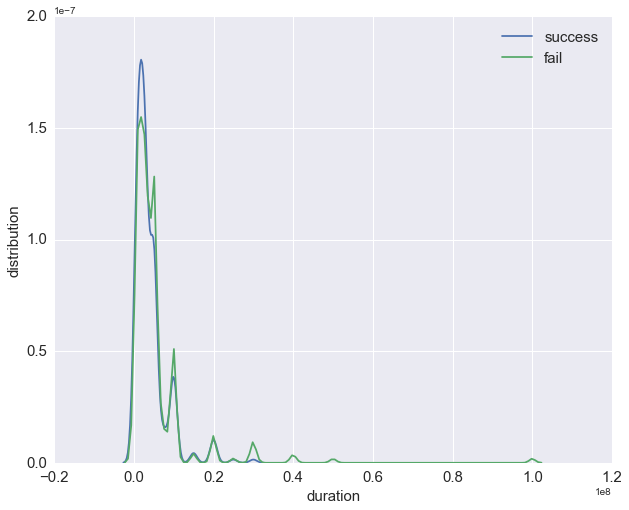

In [11]:
figure = plt.figure(figsize=(10,8))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 1]['target'], label = 'success');
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 0]['target'], label = 'fail');
#plt.xlim(-3, 10)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.legend(fontsize = 15);
plt.xlabel('duration', fontsize=15);
plt.ylabel('distribution', fontsize = 15);

In [12]:
success_target = wadiz_df.loc[wadiz_df['success'] == 1]['target']
fail_target = wadiz_df.loc[wadiz_df['success'] == 0]['target']

In [13]:
#정규성 test (성공 샘플의 목표펀딩금액)
print('Shapiro test statistics :', sp.stats.shapiro(success_target)[0]),
print('Shapiro test p-value :', sp.stats.shapiro(success_target)[1])

Shapiro test statistics : 0.7198625802993774
Shapiro test p-value : 1.6610208519768035e-22


In [14]:
#정규성 test (실패 샘플의 목표펀딩금액)
print('Shapiro test statistics :', sp.stats.shapiro(fail_target)[0]),
print('Shapiro test p-value :', sp.stats.shapiro(fail_target)[1])

Shapiro test statistics : 0.4647589325904846
Shapiro test p-value : 2.2738075406057426e-28


두 샘플 모두 정규분포를 이루지않아 (p-value < 0.05, 귀무가설 : 정규분포를 이룬다) t-test보다 mann-whiteney u test로 평균 차이 검정

In [15]:
# 분포, 평균 검정
# Ks_2sampResult : Kolmogorov-Smirnov test
# MannwhitneyuResult : Mann-Whiteney U test
print(sp.stats.ks_2samp(success_target, fail_target)),
print(sp.stats.mannwhitneyu(success_target, fail_target))

Ks_2sampResult(statistic=0.099283578721723942, pvalue=0.10013782598635514)
MannwhitneyuResult(statistic=39907.0, pvalue=0.034416467682326438)


검정 결과 두 분포는 동일한 분포(p-value >0.05)이고 평균차이는 존재함 (p-value < 0.05)

* 평균은 차이가 있음 (p-value <= 0.05) 분포는 같은 분포를 나타냄(p-vlaue >=0.05)

In [16]:
print('성공 Project들의 target 평균 :', np.mean(success_target), 
      'Std :', np.std(success_target))
print('실패 Project들의 target 평균 :', np.mean(fail_target),
     'Std :', np.std(fail_target))

성공 Project들의 target 평균 : 4107743.6559485532 Std : 4201818.2984275585
실패 Project들의 target 평균 : 5486219.315789473 Std : 8552866.386800518


## 5. Month Distribution

In [17]:
print('<월별 프로젝트 수>')
print(wadiz_df['month'].value_counts())

<월별 프로젝트 수>
11.0    72
1.0     71
12.0    65
10.0    62
8.0     60
9.0     45
7.0     42
6.0     42
2.0     42
5.0     36
4.0     32
3.0     27
Name: month, dtype: int64


<월별 성공/실패 분포>


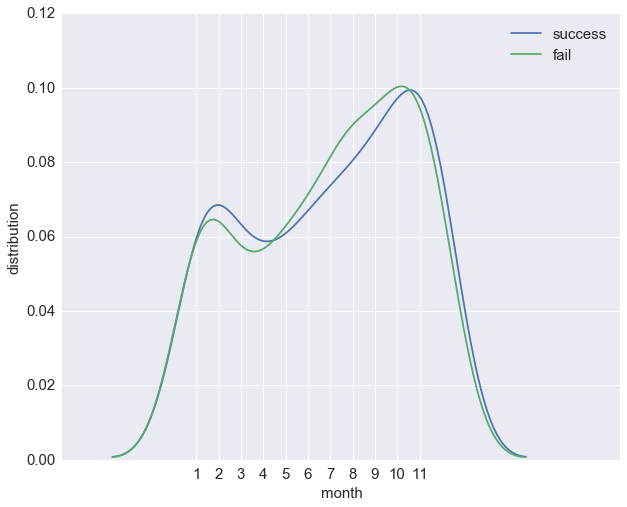

In [18]:
plt.figure(figsize=(10,8))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] ==1]['month'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] ==0]['month'], label = 'fail')
plt.xticks(range(1, 12), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('month', fontsize=15)
plt.ylabel('distribution', fontsize = 15)
plt.legend(fontsize = 15)
print('<월별 성공/실패 분포>')

In [34]:
# Ks_2sampResult : Kolmogorov-Smirnov test
# Ttest_indResult : 2 sample T-test
success_month = wadiz_df.loc[wadiz_df['success'] ==1]['month']
fail_month = wadiz_df.loc[wadiz_df['success'] ==0]['month']
print('[success_month vs fail_month]'), 
print('')
print(sp.stats.ks_2samp(success_month, fail_month))
print(sp.stats.ttest_ind(success_month, fail_month))

[success_month vs fail_month]

Ks_2sampResult(statistic=0.038179048908444702, pvalue=0.97975316216512265)
Ttest_indResult(statistic=0.14688205512885788, pvalue=0.8832749535256682)


* K-S test, t-test 결과 두 분포의 차이는 없음

## 6. 개설자 Grammar level Distribution

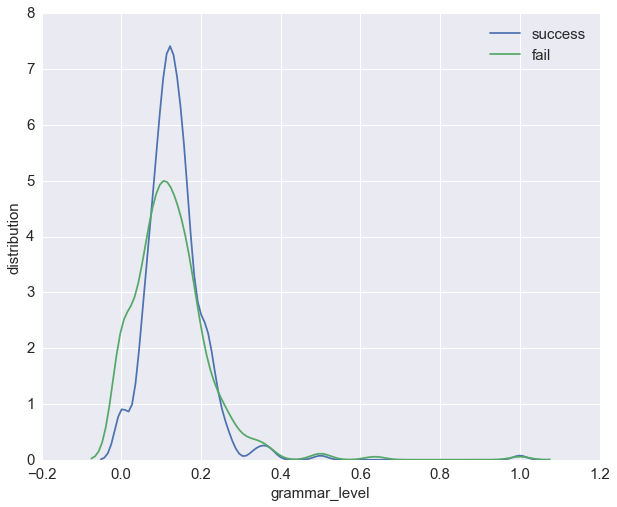

In [20]:
plt.figure(figsize=(10,8))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 1]['provider_grammar_level'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 0]['provider_grammar_level'], label = 'fail')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('grammar_level', fontsize=15)
plt.ylabel('distribution', fontsize = 15)
plt.legend(fontsize = 15)

In [21]:
wadiz_df['log_grammar_level'] = wadiz_df['provider_grammar_level'].apply(lambda x: np.log(x))

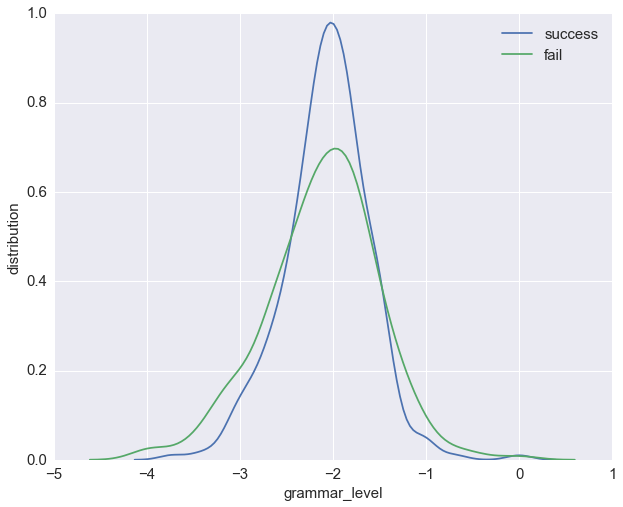

In [22]:
# log scailing
plt.figure(figsize=(10,8))
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 1]['log_grammar_level'], label = 'success')
sns.kdeplot(wadiz_df.loc[wadiz_df['success'] == 0]['log_grammar_level'], label = 'fail')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('grammar_level', fontsize=15)
plt.ylabel('distribution', fontsize = 15)
plt.legend(fontsize = 15)

In [23]:
success_grammar = wadiz_df.loc[wadiz_df['success'] == 1]['provider_grammar_level']
fail_grammar = wadiz_df.loc[wadiz_df['success'] == 0]['provider_grammar_level']

In [24]:
success_log_grammar = wadiz_df.loc[wadiz_df['success'] == 1]['log_grammar_level']
fail_log_grammar = wadiz_df.loc[wadiz_df['success'] == 0]['log_grammar_level']

In [25]:
#정규성 test (성공 샘플의 grammar)
print('Shapiro test statistics :', sp.stats.shapiro(success_grammar)[0]),
print('Shapiro test p-value :', sp.stats.shapiro(success_grammar)[1])

Shapiro test statistics : 0.7470260858535767
Shapiro test p-value : 1.6897630811000653e-21


In [26]:
#정규성 test (실패 샘플의 grammar)
print('Shapiro test statistics :', sp.stats.shapiro(fail_grammar)[0]),
print('Shapiro test p-value :', sp.stats.shapiro(fail_grammar)[1])

Shapiro test statistics : 0.8043199777603149
Shapiro test p-value : 3.117458026664843e-18


In [27]:
# Ks_2sampResult : Kolmogorov-Smirnov test
# MannwhitneyuResult : Mann-Whiteney U test
print(sp.stats.ks_2samp(success_grammar, fail_grammar)),
print(sp.stats.mannwhitneyu(success_grammar, fail_grammar))

Ks_2sampResult(statistic=0.16116658204998024, pvalue=0.00074889546400997862)
MannwhitneyuResult(statistic=49327.5, pvalue=0.017029217876484169)


grammar_level을 변형시키지않고  분석시 정규분포가 성립하지 않음.
Mann-whiteney u test 실시하면 평균차이가 있다는 결과가 나오고 성공/실패 샘플 두 분포는 다른 분포임

In [28]:
#정규성 test (실패 샘플의 log_grammar)
print('Shapiro test statistics :', sp.stats.shapiro(success_log_grammar)[0]),
print('Shapiro test p-value :', sp.stats.shapiro(success_log_grammar)[1])

Shapiro test statistics : nan
Shapiro test p-value : 1.0


In [29]:
#정규성 test (성공 샘플의 log_grammar)
print('Shapiro test statistics :', sp.stats.shapiro(fail_log_grammar)[0]),
print('Shapiro test p-value :', sp.stats.shapiro(fail_log_grammar)[1])

Shapiro test statistics : nan
Shapiro test p-value : 1.0


In [30]:
# Ks_2sampResult : Kolmogorov-Smirnov test
# MannwhitneyuResult : Mann-Whiteney U test
print(sp.stats.ks_2samp(success_log_grammar, fail_log_grammar)),
print(sp.stats.mannwhitneyu(success_log_grammar, fail_log_grammar))

Ks_2sampResult(statistic=0.16116658204998024, pvalue=0.00074889546400997862)
MannwhitneyuResult(statistic=49327.5, pvalue=0.017029217876484169)


# # Result

- 각 Category는 전체 샘플과 동일한 분포를 이룬다.
- 각 Area는 샘플 수가 작아 검정이 불가하다. 하지만 상대적으로 수가 많은 서울/경기는 검정이 가능하나 분포와 평균의 차이는 없다.
- 성공/실패 샘플 간 펀딩기간의 평균차이는 존재하지만 분포의 차이는 존재하지 않는다.
- 성공/실패 샘플 간 월(month)에 따른 분포차이는 없다.
- 성공/실패 샘플 간 목표펀딩금액(target)은 분포는 동일하지만 평균 차이는 존재한다.
- 성공/실패 샘플 간 개설자의 grammar_level 분포의 차이 존재하고 평균의 차이도 존재한다.